In [150]:
import pandas as pd
import numpy as np

In [63]:
names1880 = pd.read_csv('/Users/Brian/desktop/names/yob1880.txt',
                     header=None, names=['name', 'sex', 'births'],engine='python')
names1880 [:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [64]:
# total birth number of that year group by 'sex'

In [65]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [66]:
# combine the data from multiple files and add attributes 'year'

In [67]:
years = range (1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = '/Users/Brian/desktop/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [68]:
# put all the data into one data frame

In [69]:
names = pd.concat(pieces, ignore_index=True)

In [70]:
names [:5]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [71]:
# analyze the above data using pivot_table or groupby. eg, total births of each year grouped by sex

In [72]:
total_births = names.pivot_table ('births', index = 'year', columns='sex', aggfunc=sum)

In [73]:
total_births.tail()

sex,F,M
year,,
2006,1899824,2053753
2007,1921053,2073784
2008,1889069,2038194
2009,1835062,1981481
2010,1775345,1916476


In [84]:
#plot 'total births by sex and year'

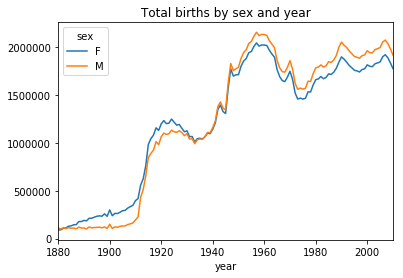

In [85]:
total_births.plot(title='Total births by sex and year')

In [86]:
#add new attributes : probability of each name, sorted by year & sex

In [88]:
def add_prop(self):
    self['prop'] = self.births/ self.births.sum()
    return self
names = names.groupby(['year', 'sex']).apply(add_prop)
names [:5]

,name,sex,births,year,prop,prob
0,Mary,F,7065,1880,0.077642,0.077642
1,Anna,F,2604,1880,0.028617,0.028617
2,Emma,F,2003,1880,0.022012,0.022012
3,Elizabeth,F,1939,1880,0.021309,0.021309
4,Minnie,F,1746,1880,0.019188,0.019188


In [ ]:
# probability check

In [90]:
names.groupby(['year', 'sex']).prob.sum() [:5]

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
Name: prob, dtype: float64

In [101]:
#take the top 500 combinations of name/sex/year

In [135]:
def get_top500(self):
    return self.sort_values(by='births', ascending=False)[:500]
grouped = names.groupby(['year','sex'])
top500 = grouped.apply(get_top500)
top500.reset_index(inplace=True, drop=True)

In [136]:
#method 2 to take the top 500 combinations of name/sex/year

In [138]:
top500 [:10]

,name,sex,births,year,prop,prob
0,Mary,F,7065,1880,0.077642,0.077642
1,Anna,F,2604,1880,0.028617,0.028617
2,Emma,F,2003,1880,0.022012,0.022012
3,Elizabeth,F,1939,1880,0.021309,0.021309
4,Minnie,F,1746,1880,0.019188,0.019188
5,Margaret,F,1578,1880,0.017342,0.017342
6,Ida,F,1472,1880,0.016177,0.016177
7,Alice,F,1414,1880,0.015539,0.015539
8,Bertha,F,1320,1880,0.014506,0.014506
9,Sarah,F,1288,1880,0.014155,0.014155


In [139]:
# analyzing naming trend in various interesting way
# dividing the sliced dataset by 'sex'

In [140]:
boys = top500[top500.sex == 'M']
girls = top500[top500.sex == 'F']

In [141]:
#plot the pivot table based on year & name

In [142]:
total_births = top500.pivot_table('births', index='year', columns = 'name', aggfunc = sum)

In [144]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 3110 entries, Aaden to Zula
dtypes: float64(3110)
memory usage: 3.1 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x148406470>,
      dtype=object)

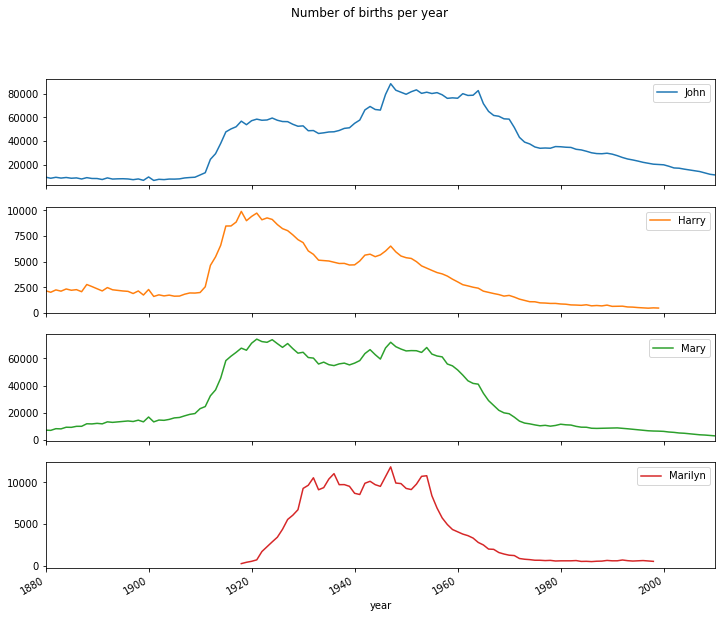

In [145]:
subset = total_births[['John','Harry','Mary', 'Marilyn']]
subset.plot(subplots = True, figsize = (12,10), grid = False, title = 'Number of births per year')

In [146]:
# more insight from the data, plot sum of prob, by year and sex

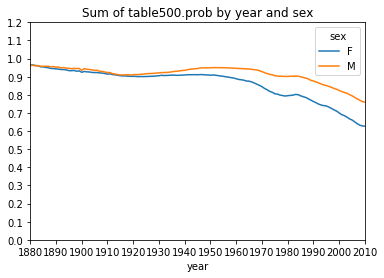

In [151]:
table = top500.pivot_table('prop', index = 'year', columns ='sex', aggfunc = sum)
table.plot(title = 'Sum of table500.prob by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [152]:
# BY analyzing the above data, we can find that the names of newborns are becoming increasingly diversified 

In [153]:
#rank popularity of name by countings

In [155]:
df = boys[boys.year == 2010]
df[:5]

,name,sex,births,year,prop,prob
130500,Jacob,M,22127,2010,0.011546,0.011546
130501,Ethan,M,18002,2010,0.009393,0.009393
130502,Michael,M,17350,2010,0.009053,0.009053
130503,Jayden,M,17179,2010,0.008964,0.008964
130504,William,M,17051,2010,0.008897,0.008897


In [156]:
# find top 50%

In [157]:
prop_cumsum = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
prop_cumsum[:10]

130500    0.011546
130501    0.020939
130502    0.029992
130503    0.038956
130504    0.047853
130505    0.056596
130506    0.065180
130507    0.073447
130508    0.081554
130509    0.089638
Name: prop, dtype: float64

In [159]:
prop_cumsum.values.searchsorted(0.5)+1

117

In [160]:
df = boys[boys.year ==1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5)+1

25

In [161]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) +1
diversity = top500.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


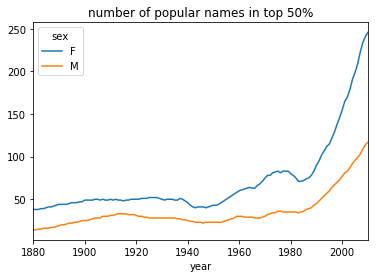

In [162]:
diversity.plot(title='number of popular names in top 50%')

In [163]:
# extract the last number from the dataset

In [164]:
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex','year'], aggfunc=sum)
subtable = table.reindex(columns=[1910,1960,2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691261.0  676865.0    977.0    5212.0   28868.0
b                 NaN     694.0     455.0    411.0    3912.0   39276.0
c                 5.0      49.0     956.0    482.0   15454.0   23348.0
d              6751.0    3731.0    2642.0  22113.0  262116.0   44828.0
e            133601.0  435030.0  316764.0  28665.0  178768.0  130253.0

In [167]:
# set base to 1

In [168]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022010.0
     2010    1775345.0
M    1910     194212.0
     1960    2132155.0
     2010    1916476.0
dtype: float64

In [169]:
letter_prop = subtable / subtable.sum()
letter_prop [:10]

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273386  0.341868  0.381258  0.005031  0.002444  0.015063
b                 NaN  0.000343  0.000256  0.002116  0.001835  0.020494
c            0.000013  0.000024  0.000538  0.002482  0.007248  0.012183
d            0.017026  0.001845  0.001488  0.113860  0.122935  0.023391
e            0.336947  0.215147  0.178424  0.147596  0.083844  0.067965
f                 NaN  0.000010  0.000055  0.000783  0.004329  0.001206
g            0.000144  0.000157  0.000377  0.002260  0.009488  0.001407
h            0.051530  0.036222  0.075972  0.045564  0.037915  0.051815
i            0.001526  0.039967  0.031699  0.000844  0.000607  0.022670
j                 NaN       NaN  0.000093       NaN       NaN  0.000772

In [170]:
# plot a bar graph by year (the last letter of names)

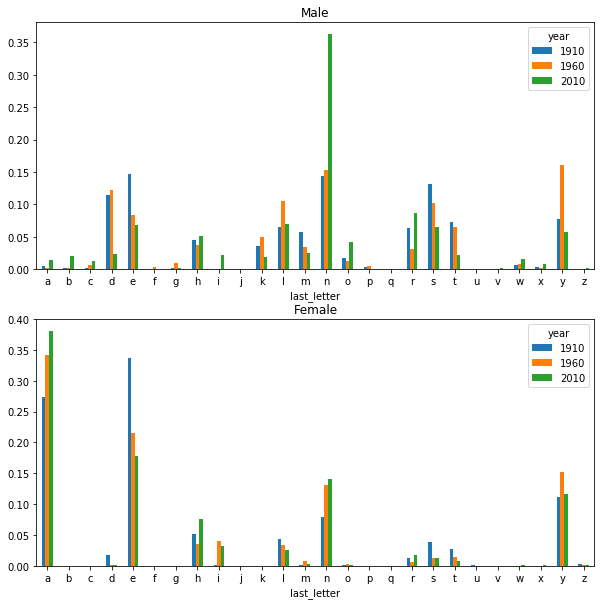

In [175]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1,figsize=(10,10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=True)

In [176]:
#plot the last letter's prob of the name

In [179]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d','n','y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


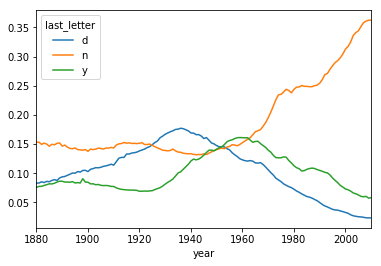

In [180]:
dny_ts.plot()

In [181]:
# find what boys' names turn to girls' name. eg, Lesley to Leslie

In [182]:
all_names = pd.Series(top500.name.unique())
lesley_like = all_names [all_names.str.lower().str.contains('lesl')]
lesley_like

652     Leslie
1930    Lesley
2805     Lesly
dtype: object

In [183]:
filtered = top500[top500.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Lesley     22295
Leslie    364497
Lesly       8043
Name: births, dtype: int64

In [184]:
#standerize the data with base '1', and apply pivot_table

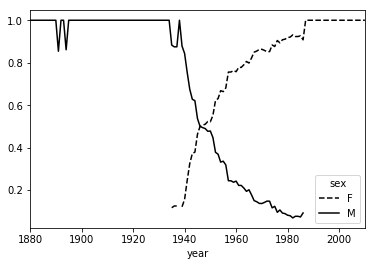

In [187]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()
table.plot(style={'M':'k-', 'F':'k--'})